### Dudeney’s Remainder Problem

We previously shared another gcd problem: [Dudeney’s Remainder Problem](https://win-vector.com/2024/10/06/dudeneys-remainder-problem/). Like [The Monkey and the Coconuts Problem](https://win-vector.com/2024/11/01/the-monkey-and-the-coconuts-an-introduction-to-the-extended-euclidean-algorithm/), it is claimed this puzzle was injuring solver's health. And it is easy to solve, if one has access to algorithms for the greatest common divisor.

In this note we emphasize the "pencil and paper" scale of the solution. We can get the answer (79) by filling in a small table (which we illustrate here by displaying multiple tables). Notice how each row is produced by computing a remainder, and then the first two columns of the next row are just the second two columns of the previous row copied down.

Let's set up our Python environment to simulate pencil and paper.

In [1]:
# import modules and functions
import numpy as np
from IPython.display import display
import gcd_table_sequential
import gcd_table
from convert_table_to_image import display_styled_table

The problem is: find an integer divisor `> 1` so the following `x`, `y`, and `y` have the same remainder. This differs a bit from common modern use of the word divisor which would imply the remainder is zero.

In [2]:
# example from:
#  https://win-vector.com/2024/10/06/dudeneys-remainder-problem/
x = 480608
y = 508811
z = 723217

The insight to the problem is: look for the greatest common divisor of `a = z - x` and `b = y - x` and we are done (by a transitivity of equality argument).

Let's do that.

In [3]:
a = z - x

a

242609

In [4]:
b = y - x

b

28203

To find the greatest common divisor of `a, b` one would build a GCD table as follows. The greatest common divisor is the last non-zero value of `r` (found in the penultimate row).

'Initial table: a = 242609, b = 28203'

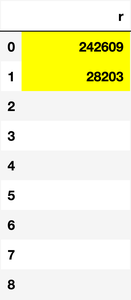

'build row 2: r[2] = r[0] % r[1], q[2] = r[0] // r[1]'

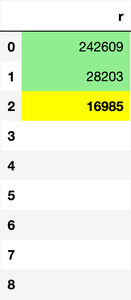

'build row 3: r[3] = r[1] % r[2], q[3] = r[1] // r[2]'

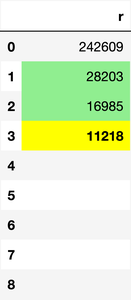

'build row 4: r[4] = r[2] % r[3], q[4] = r[2] // r[3]'

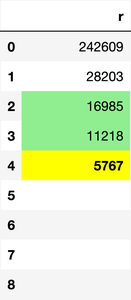

'build row 5: r[5] = r[3] % r[4], q[5] = r[3] // r[4]'

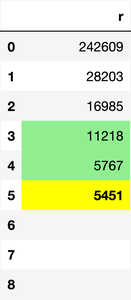

'build row 6: r[6] = r[4] % r[5], q[6] = r[4] // r[5]'

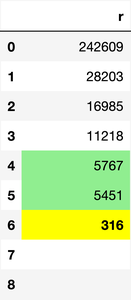

'build row 7: r[7] = r[5] % r[6], q[7] = r[5] // r[6]'

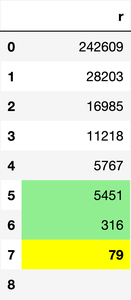

'build row 8: r[8] = r[6] % r[7], q[8] = r[6] // r[7]'

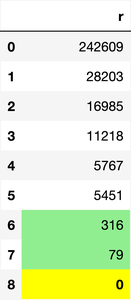

In [5]:
soln_1 = gcd_table_sequential.build_gcd_table(a, b, record_q=False, verbose=True)

for st in soln_1.attrs['captured_tables']:
    display(st.data.attrs['note'])
    display_styled_table(st, add_note=False, max_width=300, max_height=300)

And we have our greatest common divisor.

In [6]:
gcd = soln_1.attrs['gcd']
assert gcd > 1

gcd

79

This indeed solves the problem:



In [7]:
checks = (x % gcd, y % gcd, z % gcd)
assert len(set(checks)) == 1  # all same number

checks

(51, 51, 51)

Note as this is "pencil and paper" we used more more compact notation that we used before. The larger tabular notation was as follows.

'build row 0: start (a >= b)'

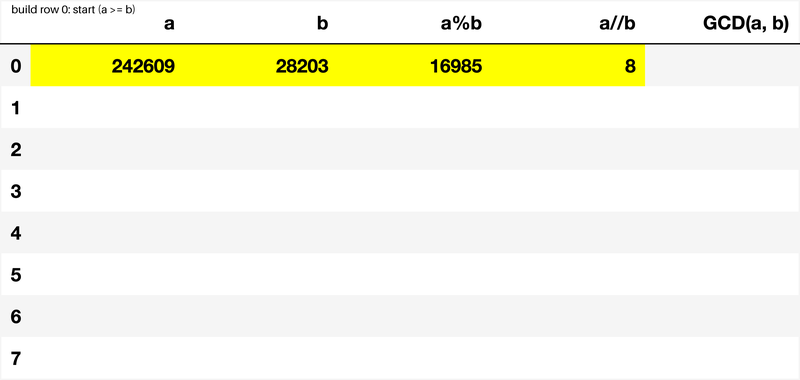

'build row 1: a[1]=b[0], b[1]=(a%b)[0]'

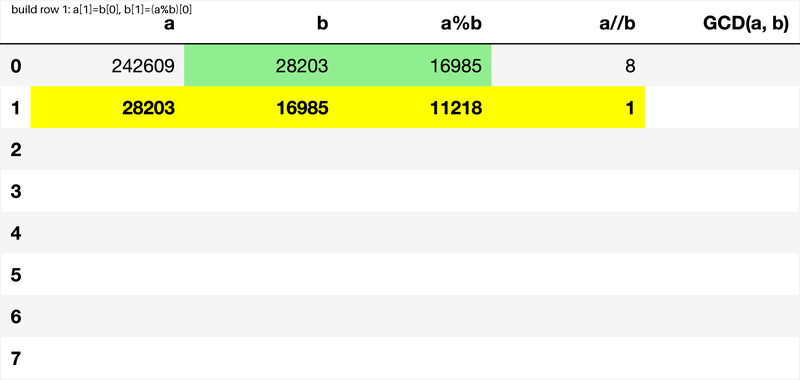

'build row 2: a[2]=b[1], b[2]=(a%b)[1]'

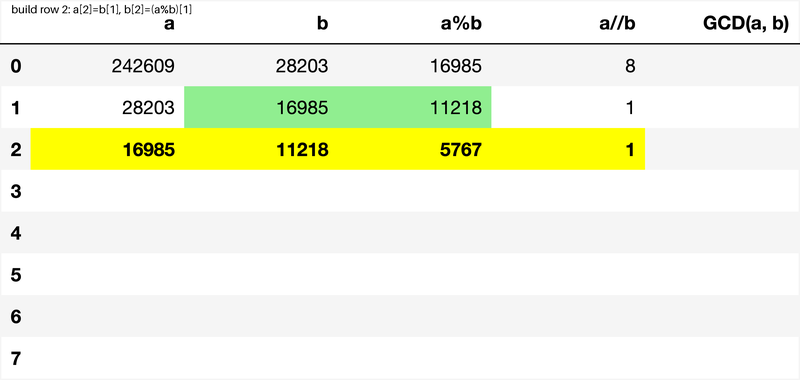

'build row 3: a[3]=b[2], b[3]=(a%b)[2]'

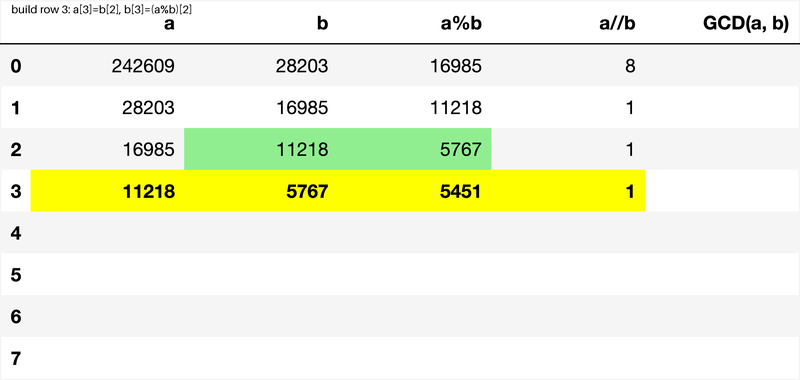

'build row 4: a[4]=b[3], b[4]=(a%b)[3]'

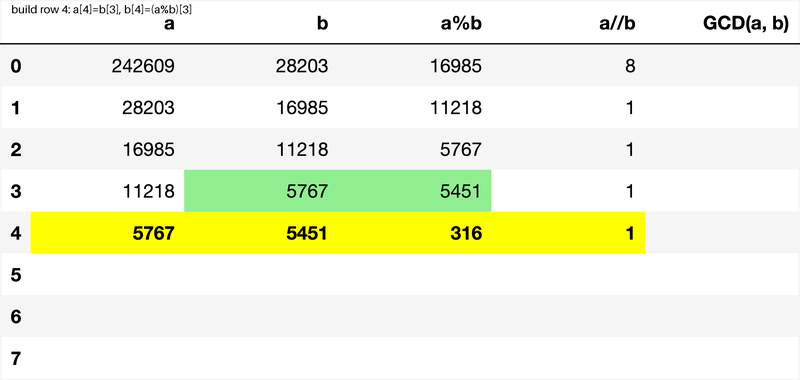

'build row 5: a[5]=b[4], b[5]=(a%b)[4]'

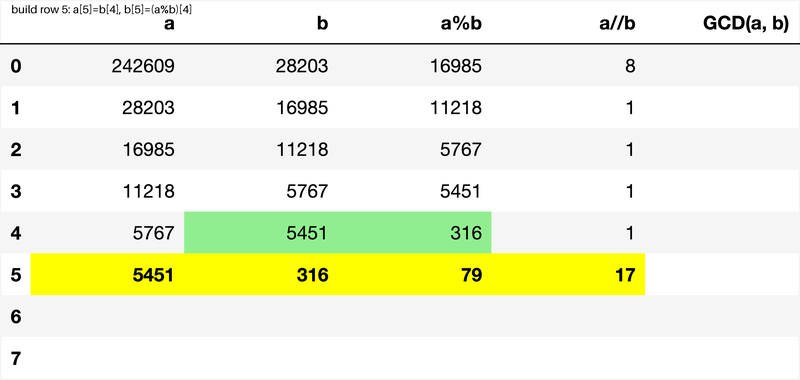

'build row 6: a[6]=b[5], b[6]=(a%b)[5]'

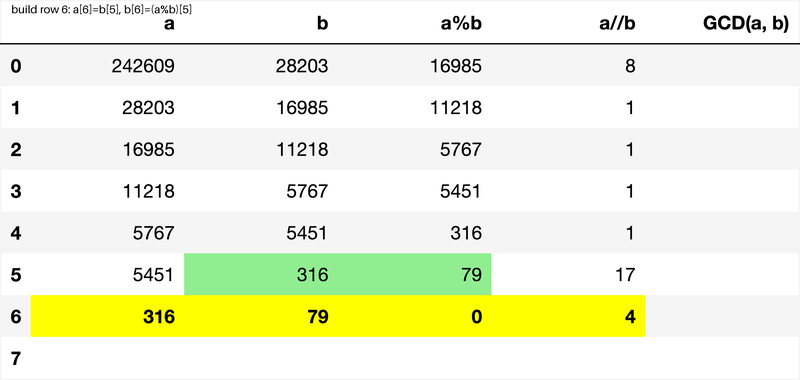

'finish with row 7: a[7]=b[6], b[7]=(a%b)[6], GCD= a[7]'

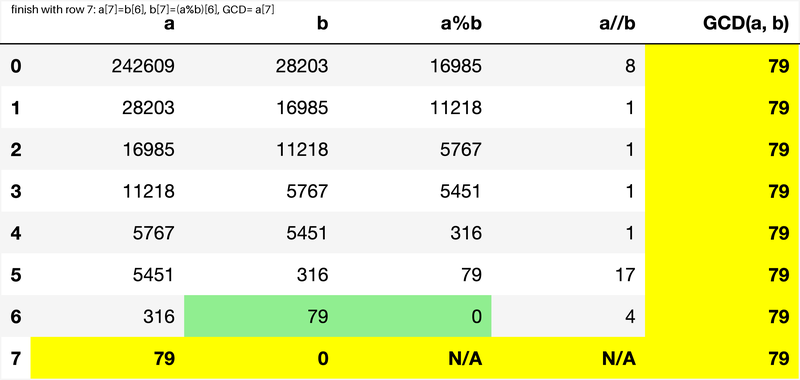

In [8]:
soln_2 = gcd_table.build_gcd_table(a, b, verbose=True)

for st in soln_2.attrs['captured_tables']:
    display(st.data.attrs['note'])
    display_styled_table(st)

## Extensions

We can also find what integer combination of `a, b` is equal to the greatest common divisor. This is called the extended euclidean algorithm, and has a bit more bookkeeping. This wasn't needed for the original puzzle solution, but it is fun to see all the steps in action.

Here it is in the verbose notation.

'build row 0: start (a >= b)'

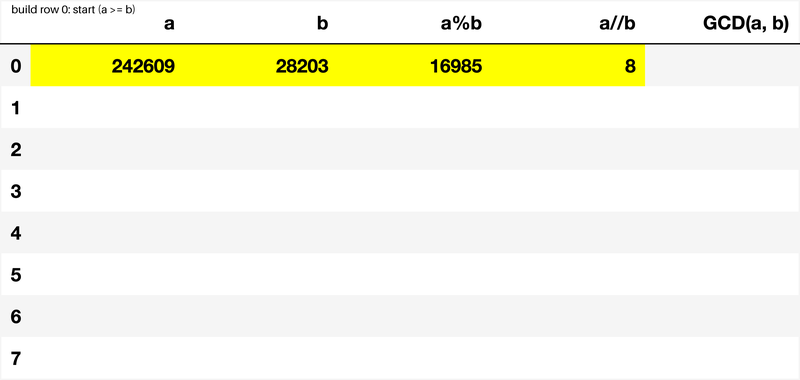

'build row 1: a[1]=b[0], b[1]=(a%b)[0]'

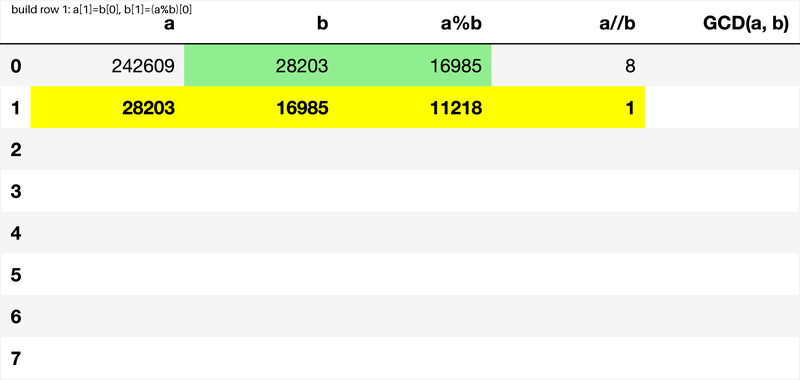

'build row 2: a[2]=b[1], b[2]=(a%b)[1]'

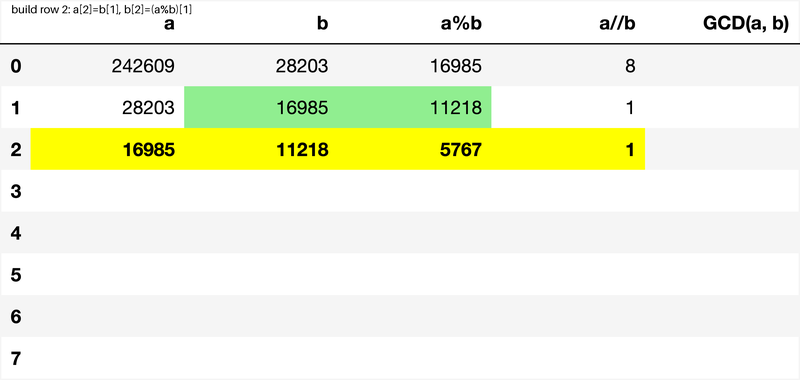

'build row 3: a[3]=b[2], b[3]=(a%b)[2]'

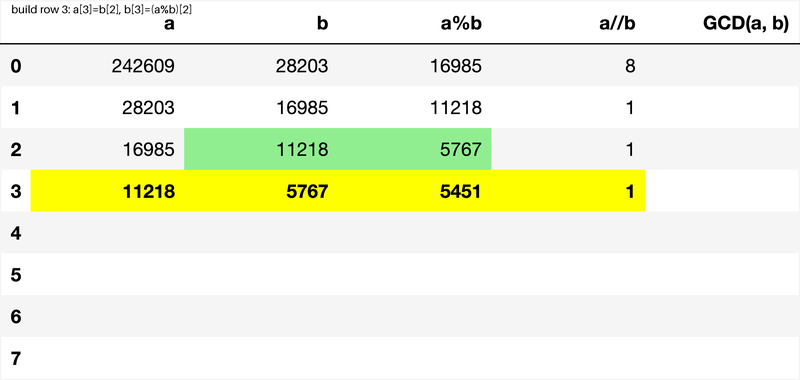

'build row 4: a[4]=b[3], b[4]=(a%b)[3]'

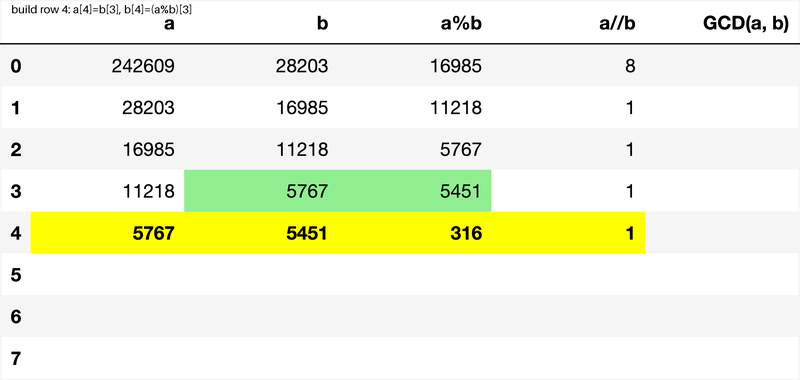

'build row 5: a[5]=b[4], b[5]=(a%b)[4]'

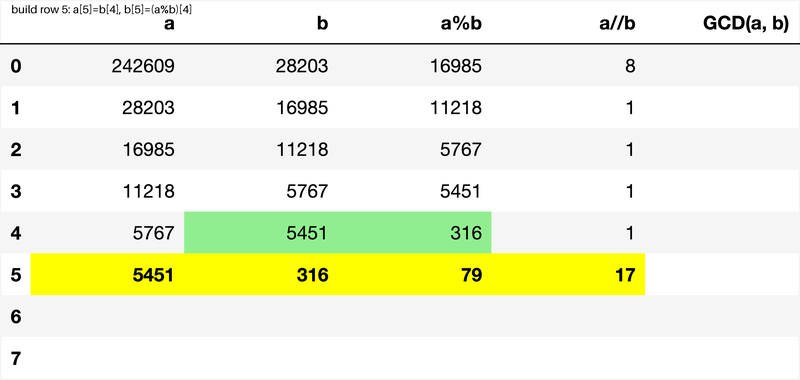

'build row 6: a[6]=b[5], b[6]=(a%b)[5]'

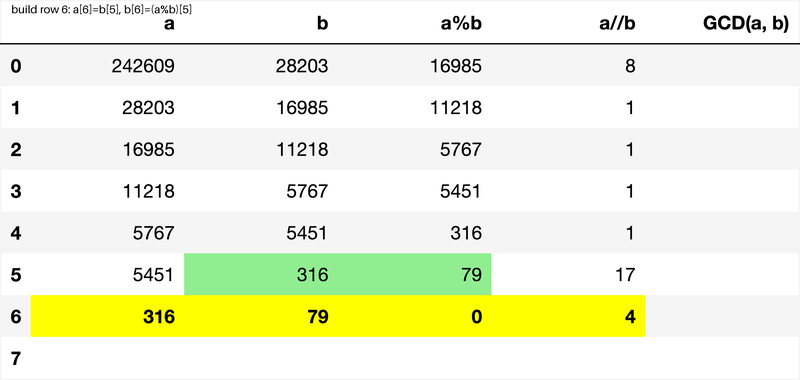

'finish with row 7: a[7]=b[6], b[7]=(a%b)[6], GCD= a[7]'

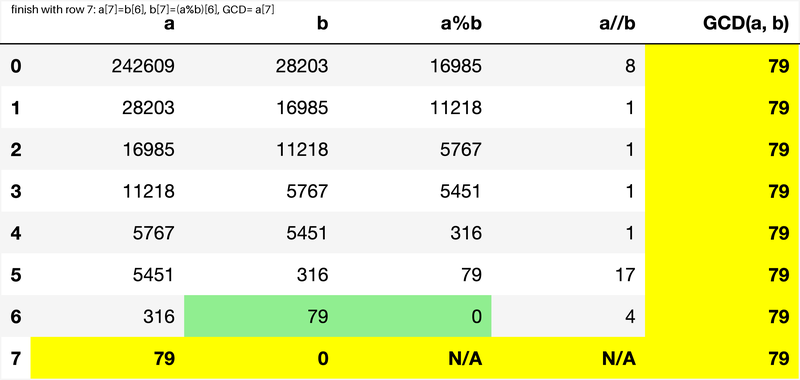

'back fill row 7: u[7]=1, v[7]=0'

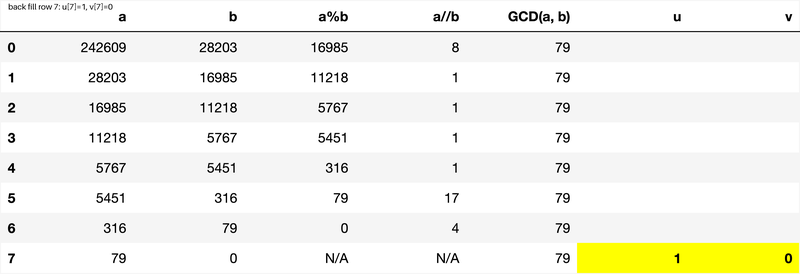

'back fill row 6: u[6]=v[7], v[6] = u[7] - (a//b)[6] * v[7]'

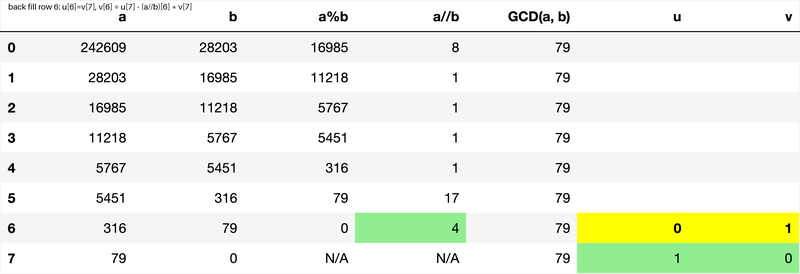

'back fill row 5: u[5]=v[6], v[5] = u[6] - (a//b)[5] * v[6]'

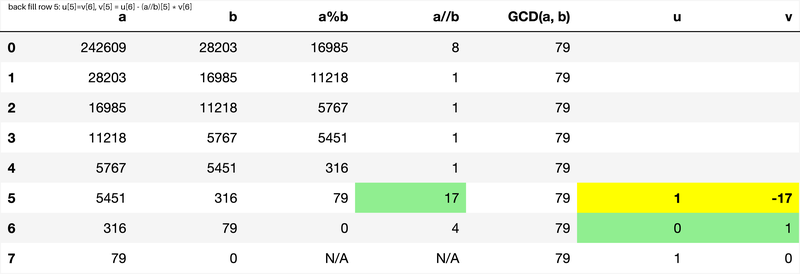

'back fill row 4: u[4]=v[5], v[4] = u[5] - (a//b)[4] * v[5]'

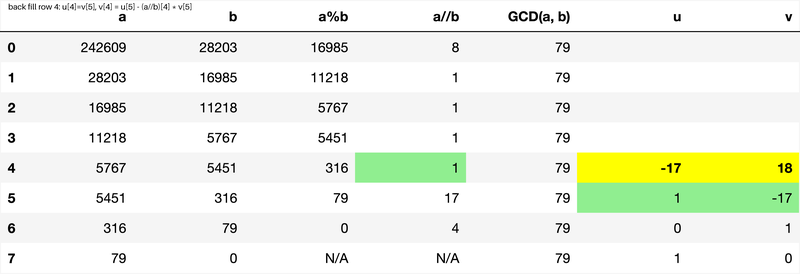

'back fill row 3: u[3]=v[4], v[3] = u[4] - (a//b)[3] * v[4]'

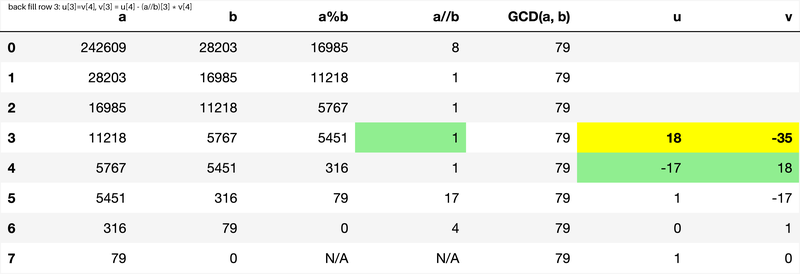

'back fill row 2: u[2]=v[3], v[2] = u[3] - (a//b)[2] * v[3]'

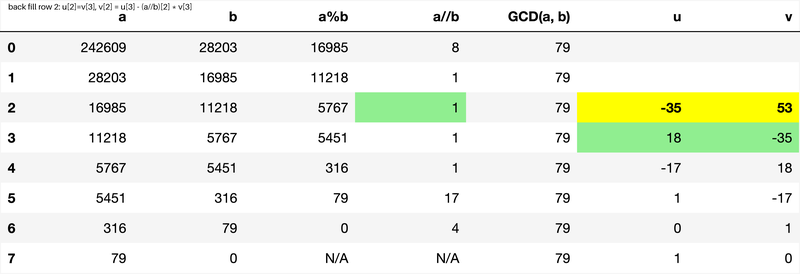

'back fill row 1: u[1]=v[2], v[1] = u[2] - (a//b)[1] * v[2]'

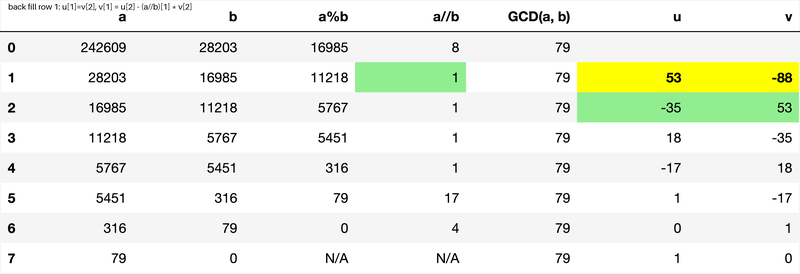

'back fill row 0: u[0]=v[1], v[0] = u[1] - (a//b)[0] * v[1]'

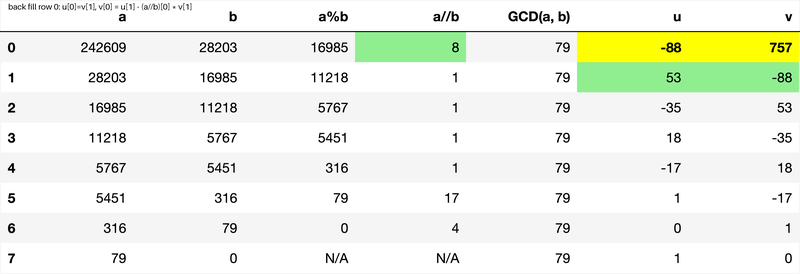

In [9]:

soln_3 = gcd_table.build_gcd_table_filled(a, b, verbose=True)

for st in soln_3.attrs['captured_tables']:
    display(st.data.attrs['note'])
    display_styled_table(st)


The greatest is now the common value in the `GCD(a, b)` column.

In [10]:
gcd = soln_3.loc[0, 'GCD(a, b)']

gcd

79

Bezout's identity states that `soln['u'] * soln['a'] + soln['v'] * soln['b'] == gcd`. We can confirm this.

In [11]:
assert np.all(soln_3['u'] * soln_3['a'] + soln_3['v'] * soln_3['b'] == gcd)

In particular, the 0-row has the `u`, `v` such that `u * a + v * b = gcd` for our original input `a`, `b`. Knowing `u`, `v` lets us solve Chinese Remainder Theorem (CRT) style problems and find modulo inverses of integers.

In [12]:
u = soln_3.loc[0, 'u']

u

-88

In [13]:
v = soln_3.loc[0, 'v']

v

757

In [14]:
assert u * a + v * b == gcd

Finally we can re-do this calculation, eliminating the need to copy numbers by using few columns (and seeing that the values were already stacked in these columns).

'Initial table: a = 242609, b = 28203'

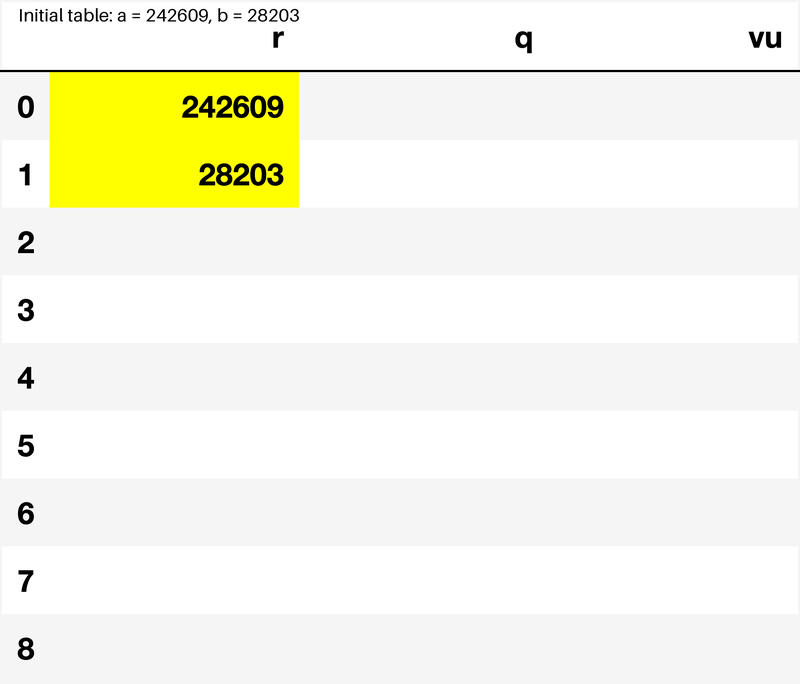

'build row 2: r[2] = r[0] % r[1], q[2] = r[0] // r[1]'

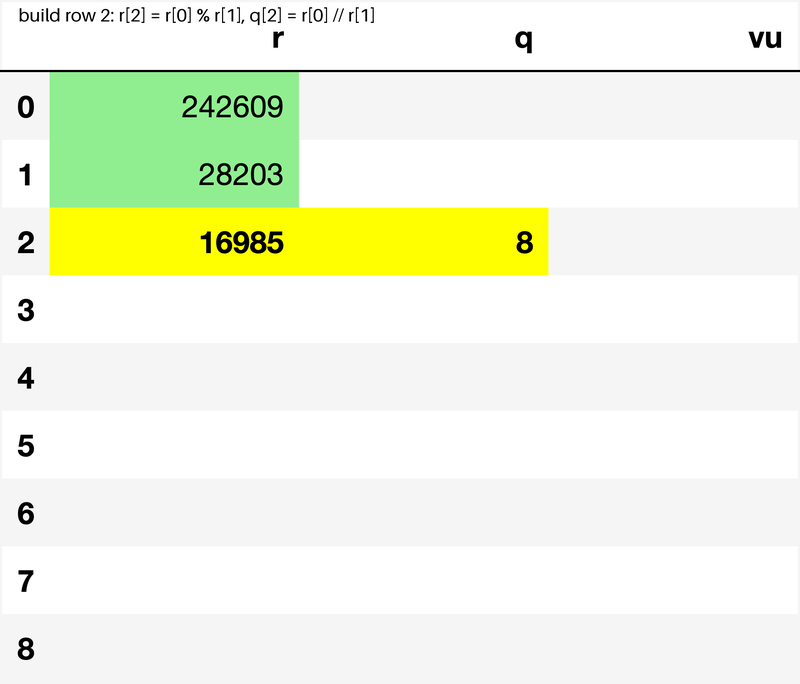

'build row 3: r[3] = r[1] % r[2], q[3] = r[1] // r[2]'

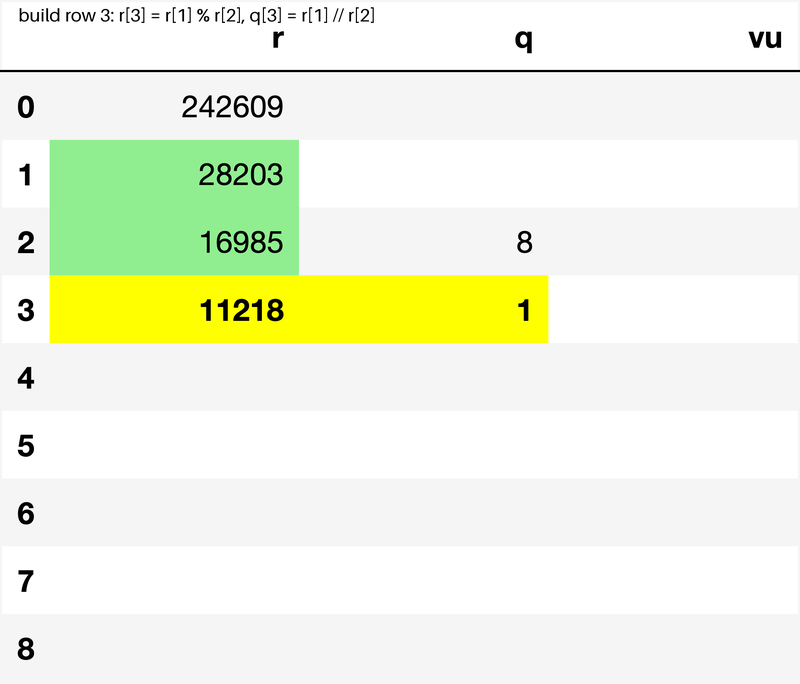

'build row 4: r[4] = r[2] % r[3], q[4] = r[2] // r[3]'

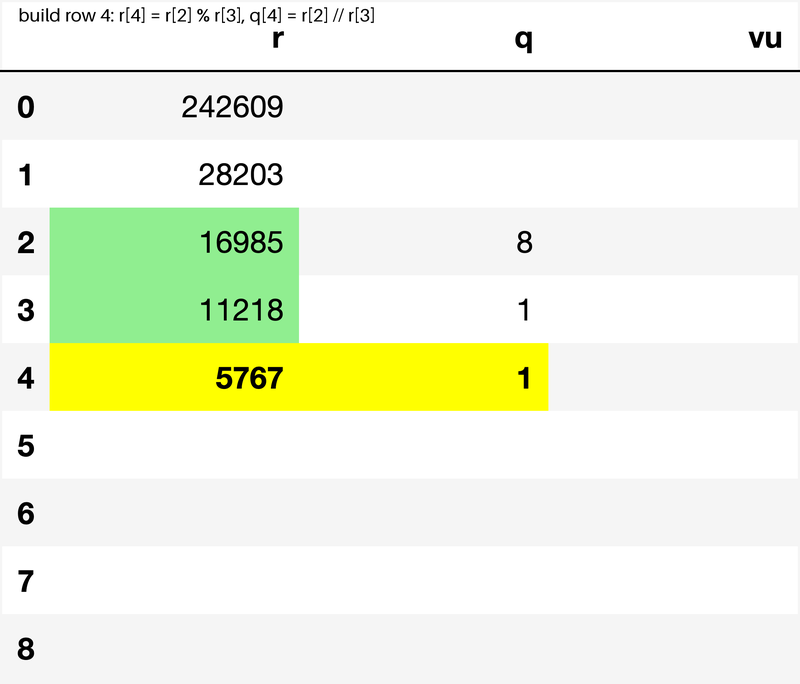

'build row 5: r[5] = r[3] % r[4], q[5] = r[3] // r[4]'

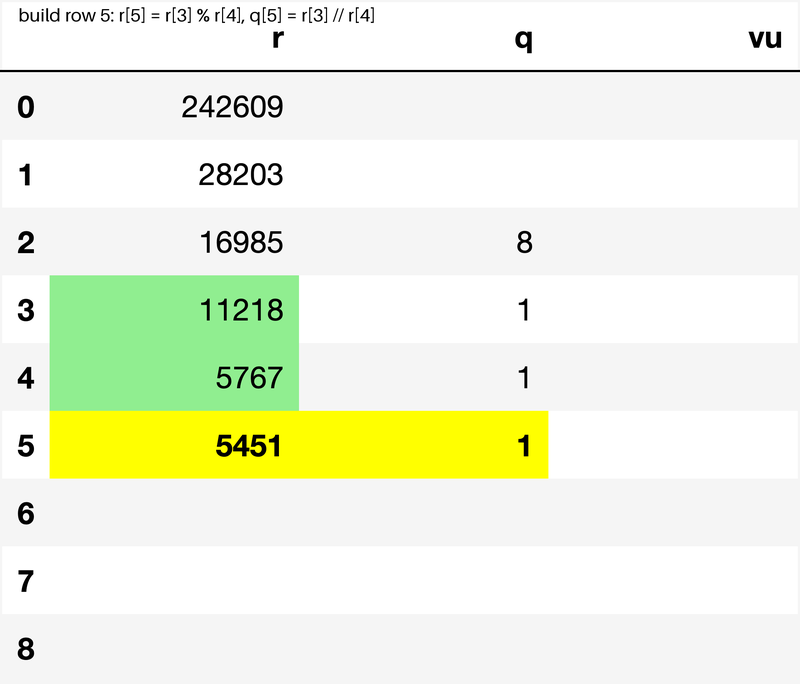

'build row 6: r[6] = r[4] % r[5], q[6] = r[4] // r[5]'

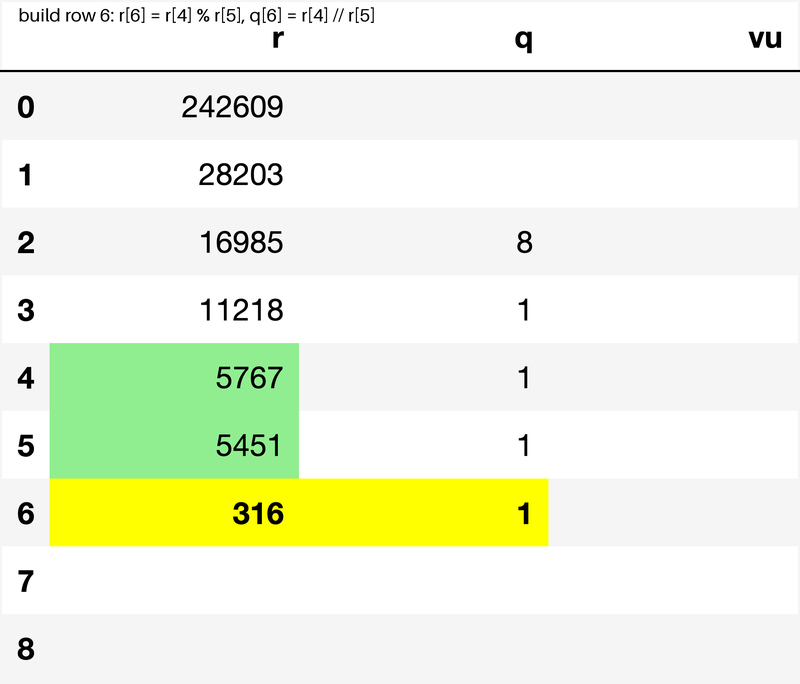

'build row 7: r[7] = r[5] % r[6], q[7] = r[5] // r[6]'

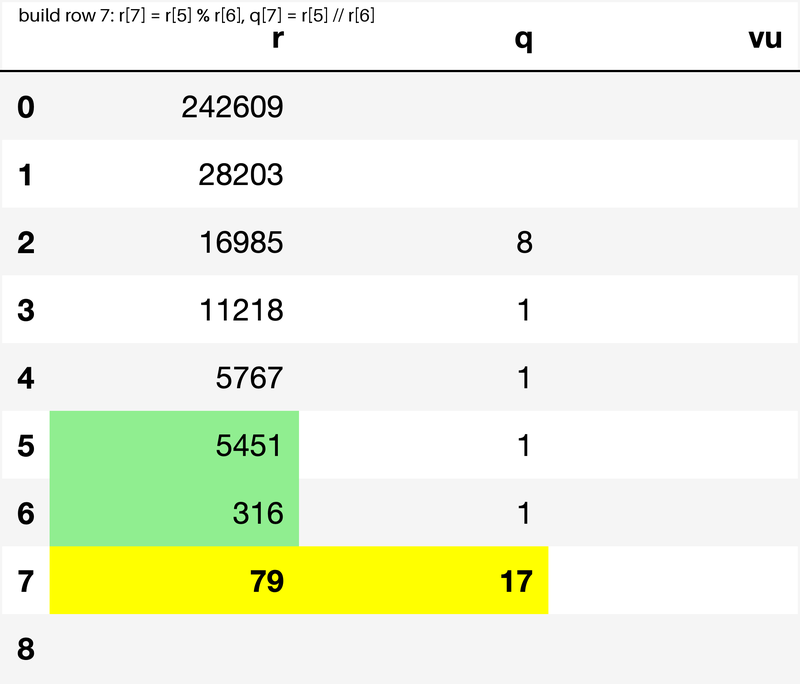

'build row 8: r[8] = r[6] % r[7], q[8] = r[6] // r[7]'

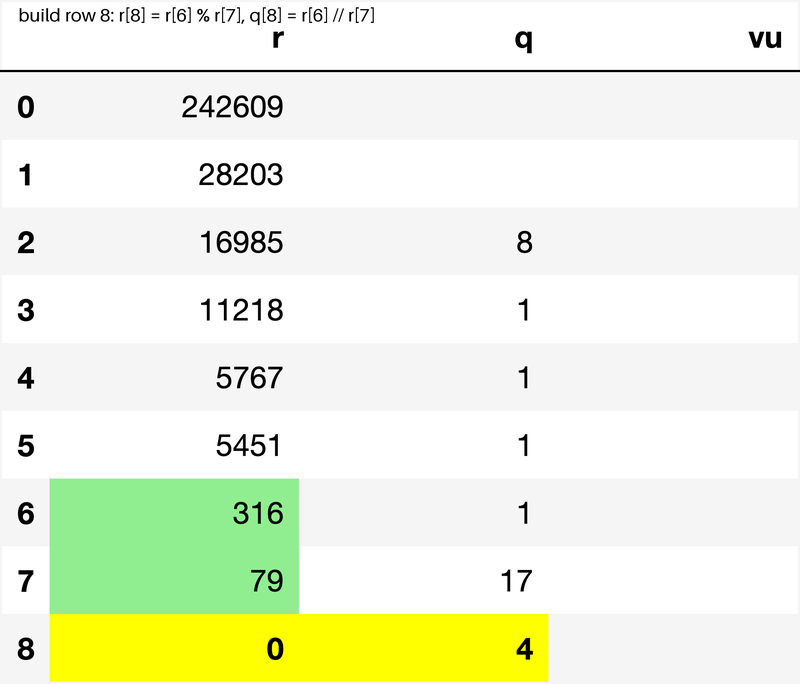

'fill bottom of table: vu[7] = 1, vu[8] = 0'

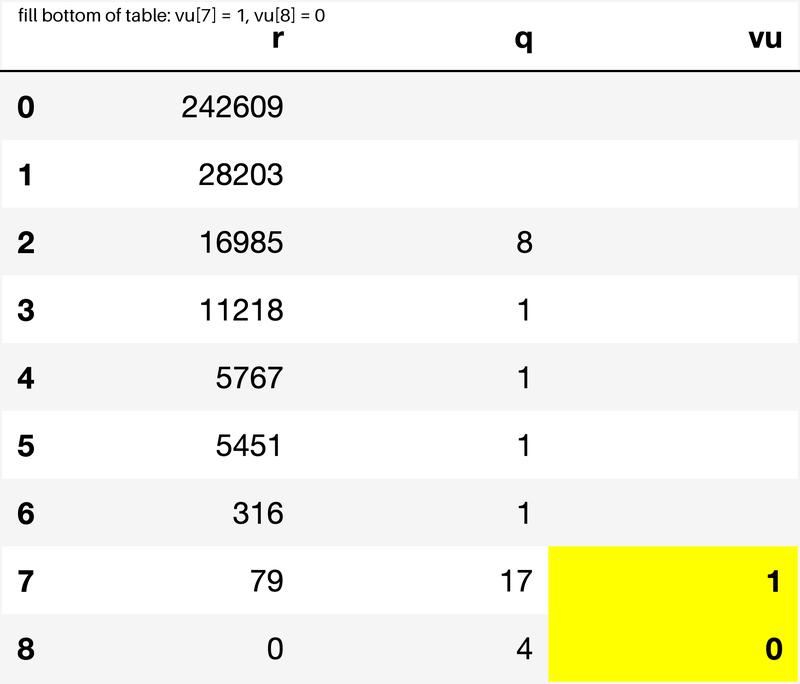

'back fill row 6: vu[6] = vu[8] - q[7] * vu[7]'

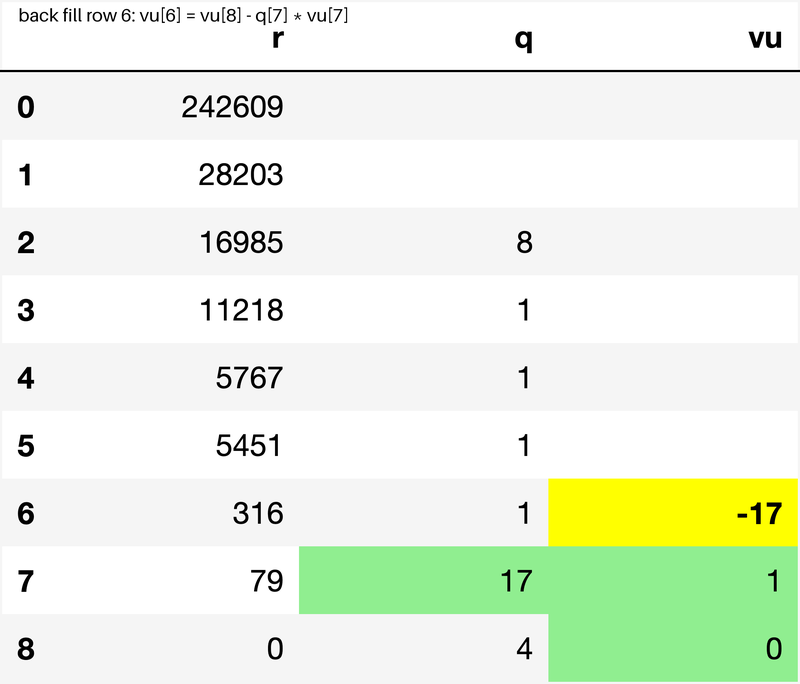

'back fill row 5: vu[5] = vu[7] - q[6] * vu[6]'

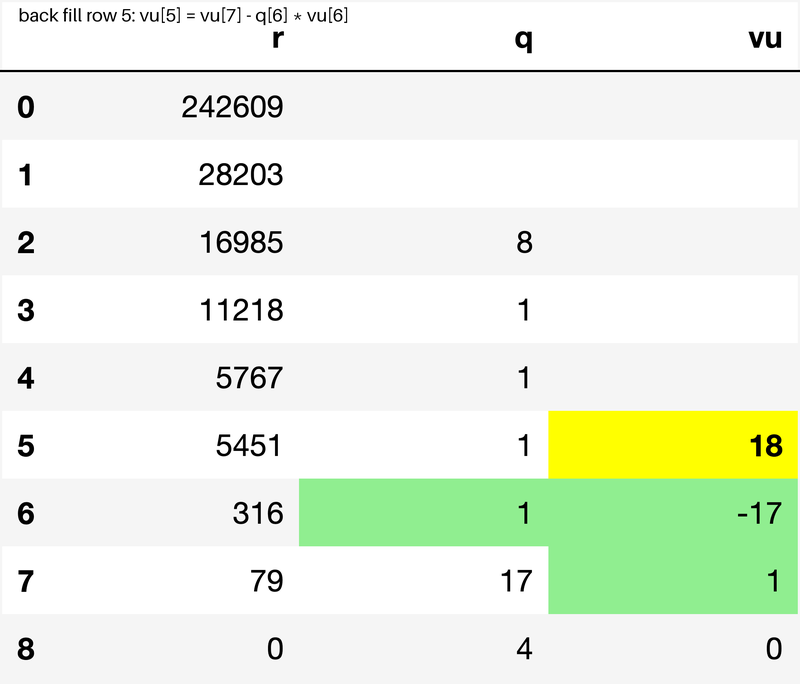

'back fill row 4: vu[4] = vu[6] - q[5] * vu[5]'

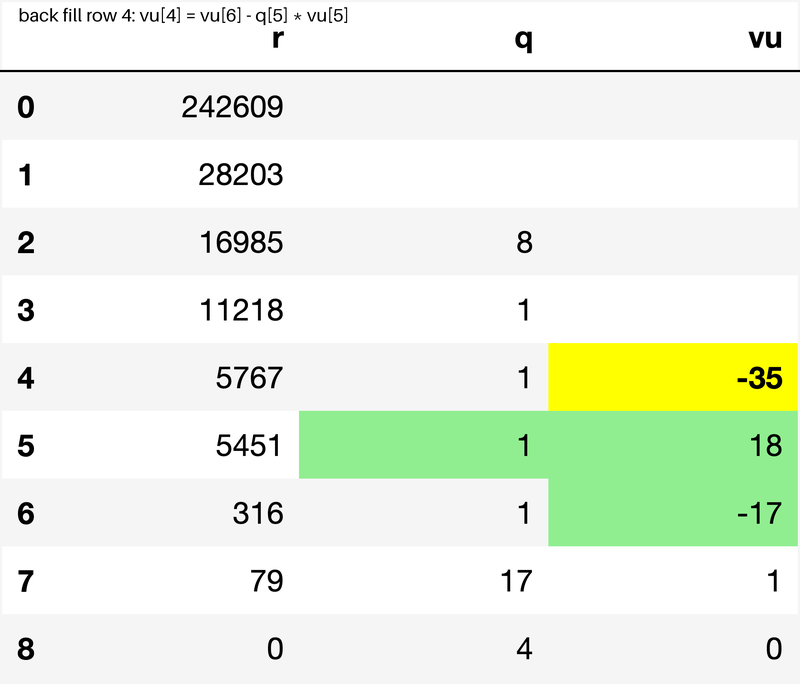

'back fill row 3: vu[3] = vu[5] - q[4] * vu[4]'

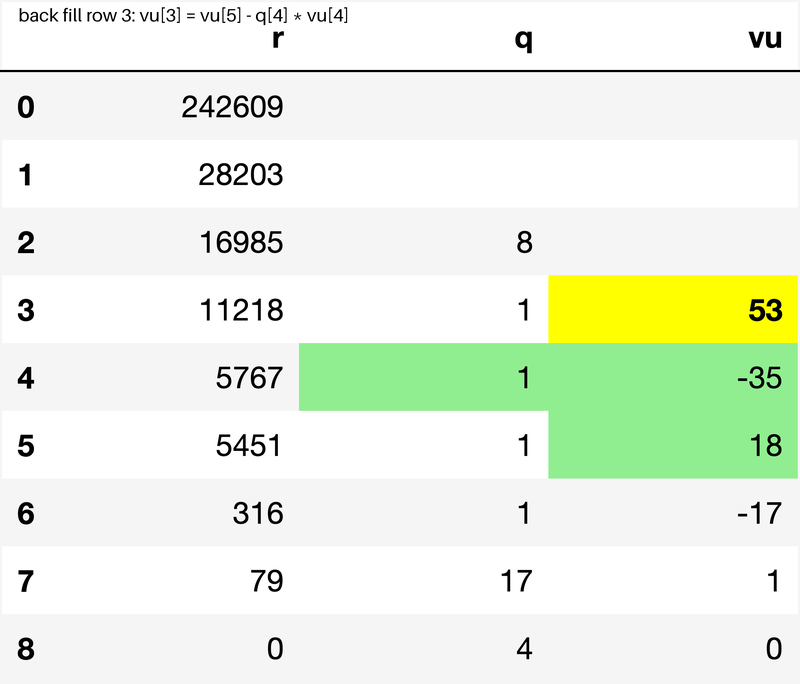

'back fill row 2: vu[2] = vu[4] - q[3] * vu[3]'

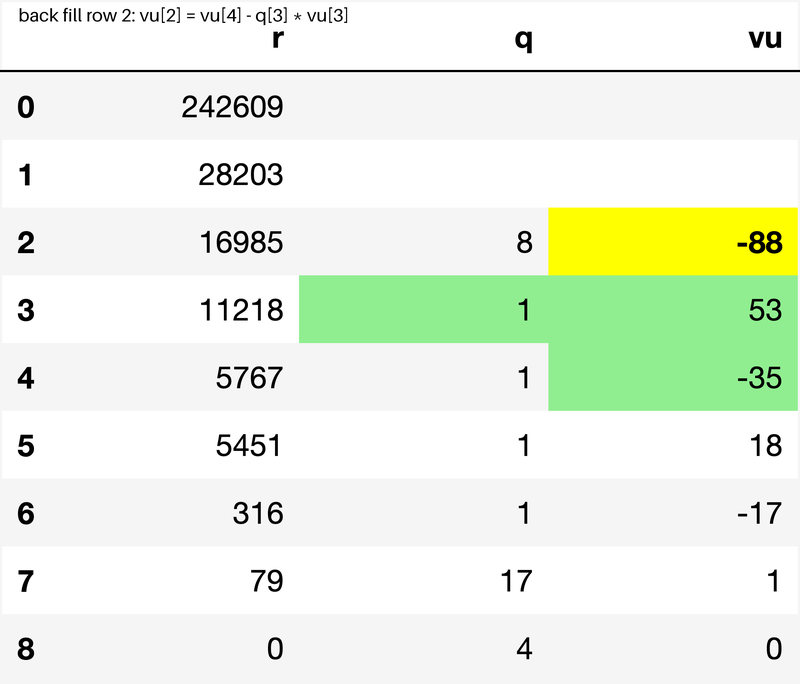

'back fill row 1: vu[1] = vu[3] - q[2] * vu[2]'

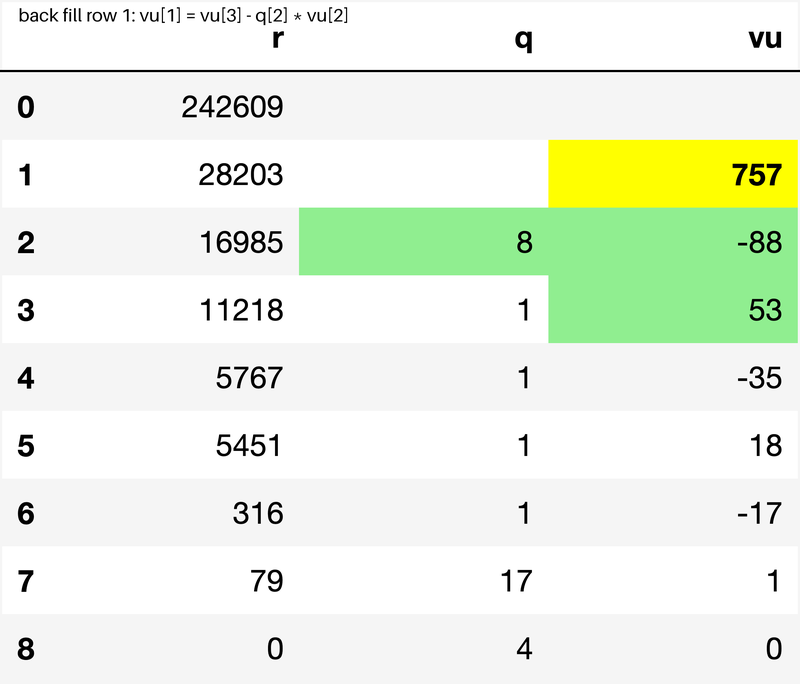

In [15]:
soln_4 = gcd_table_sequential.build_gcd_table_filled(a, b, verbose=True)

for st in soln_4.attrs['captured_tables']:
    display(st.data.attrs['note'])
    display_styled_table(st)



An animation of these steps (without sound or commentary) is available [here](https://youtu.be/KzEiqxRTaes).